In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import datetime

In [31]:
# Load dataset
data = pd.read_csv("house_prices.csv")
data.head(10)

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price
0,4,1.6,799,0.62,56347,1.93,18,1980,1980,3.25,1.25,254036.40
1,5,1.9,638,0.67,128725,0.89,18,1959,1972,3.85,1.44,290828.33
2,3,3.6,858,0.89,133844,1.44,21,2005,2017,3.56,0.55,307291.91
3,5,2.0,2022,0.60,121321,1.45,26,2019,2040,5.45,0.51,450113.10
4,5,1.9,3956,0.65,79056,1.26,16,1969,1969,5.72,1.16,780451.24
5,2,3.7,2127,0.20,93851,1.53,13,1954,1954,3.21,0.79,497595.54
6,3,2.7,1803,0.50,128234,1.33,7,1972,1972,5.46,0.75,479903.75
7,3,1.2,1634,0.73,111502,0.90,1,1958,1958,5.13,0.83,455500.07
8,3,2.7,2686,0.31,126633,1.32,26,2007,2031,5.72,0.77,531498.35
9,5,3.4,3670,0.24,111418,0.64,16,2008,2008,2.98,1.01,731001.87


In [32]:

data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bedrooms             1000 non-null   int64  
 1   Bathrooms            1000 non-null   float64
 2   SquareFootage        1000 non-null   int64  
 3   LotSize              1000 non-null   float64
 4   MedianIncome         1000 non-null   int64  
 5   PropertyTaxRate      1000 non-null   float64
 6   ProximityCityCenter  1000 non-null   int64  
 7   YearBuilt            1000 non-null   int64  
 8   LastRenovationYear   1000 non-null   int64  
 9   InterestRate         1000 non-null   float64
 10  DemandIndex          1000 non-null   float64
 11  Price                1000 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 93.9 KB


In [33]:
data.describe()

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.004000,2.483700,2830.851000,0.518950,90751.969000,1.463680,15.06300,1986.900000,1993.547000,3.988700,1.004010,590375.191200
std,1.433192,0.855053,1280.926931,0.273001,35681.233019,0.574503,8.26979,21.329063,25.217369,1.126332,0.286503,195555.743686
min,1.000000,1.000000,502.000000,0.050000,30060.000000,0.500000,1.00000,1950.000000,1950.000000,2.000000,0.500000,156857.700000
25%,2.000000,1.700000,1751.500000,0.280000,59220.250000,0.970000,8.00000,1968.750000,1973.000000,3.060000,0.750000,430021.652500
50%,3.000000,2.500000,2950.500000,0.510000,91659.500000,1.450000,15.00000,1986.000000,1993.000000,3.985000,1.000000,600934.570000
75%,4.000000,3.200000,3971.750000,0.750000,122961.750000,1.950000,22.00000,2006.000000,2013.000000,4.940000,1.260000,755478.127500
max,5.000000,4.000000,4998.000000,1.000000,149875.000000,2.500000,29.00000,2022.000000,2071.000000,6.000000,1.500000,962130.020000


In [34]:
data.columns

Index(['Bedrooms', 'Bathrooms', 'SquareFootage', 'LotSize', 'MedianIncome',
       'PropertyTaxRate', 'ProximityCityCenter', 'YearBuilt',
       'LastRenovationYear', 'InterestRate', 'DemandIndex', 'Price'],
      dtype='object')

In [35]:
print(data.nunique())

Bedrooms                  5
Bathrooms                31
SquareFootage           887
LotSize                  96
MedianIncome            995
PropertyTaxRate         200
ProximityCityCenter      29
YearBuilt                73
LastRenovationYear      115
InterestRate            370
DemandIndex             101
Price                  1000
dtype: int64


In [36]:
# Convert YearBuilt and LastRenovationYear to datetime format
data['YearBuilt'] = pd.to_datetime(data['YearBuilt'], format='%Y')
data['LastRenovationYear'] = pd.to_datetime(data['LastRenovationYear'], format='%Y')


In [37]:
# Feature Engineering: Creating new useful features
data['HouseAge'] = pd.to_datetime("today").year - data['YearBuilt'].dt.year
data['YearsSinceRenovation'] = pd.to_datetime("today").year - data['LastRenovationYear'].dt.year
data.head(10)

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,YearBuilt,LastRenovationYear,InterestRate,DemandIndex,Price,HouseAge,YearsSinceRenovation
0,4,1.6,799,0.62,56347,1.93,18,1980-01-01,1980-01-01,3.25,1.25,254036.40,45,45
1,5,1.9,638,0.67,128725,0.89,18,1959-01-01,1972-01-01,3.85,1.44,290828.33,66,53
2,3,3.6,858,0.89,133844,1.44,21,2005-01-01,2017-01-01,3.56,0.55,307291.91,20,8
3,5,2.0,2022,0.60,121321,1.45,26,2019-01-01,2040-01-01,5.45,0.51,450113.10,6,-15
4,5,1.9,3956,0.65,79056,1.26,16,1969-01-01,1969-01-01,5.72,1.16,780451.24,56,56
5,2,3.7,2127,0.20,93851,1.53,13,1954-01-01,1954-01-01,3.21,0.79,497595.54,71,71
6,3,2.7,1803,0.50,128234,1.33,7,1972-01-01,1972-01-01,5.46,0.75,479903.75,53,53
7,3,1.2,1634,0.73,111502,0.90,1,1958-01-01,1958-01-01,5.13,0.83,455500.07,67,67
8,3,2.7,2686,0.31,126633,1.32,26,2007-01-01,2031-01-01,5.72,0.77,531498.35,18,-6
9,5,3.4,3670,0.24,111418,0.64,16,2008-01-01,2008-01-01,2.98,1.01,731001.87,17,17


In [38]:
# Drop original YearBuilt and LastRenovationYear
data.drop(columns=['YearBuilt', 'LastRenovationYear'], inplace=True)


In [39]:
data.head(10)

,Bedrooms,Bathrooms,SquareFootage,LotSize,MedianIncome,PropertyTaxRate,ProximityCityCenter,InterestRate,DemandIndex,Price,HouseAge,YearsSinceRenovation
0,4,1.6,799,0.62,56347,1.93,18,3.25,1.25,254036.40,45,45
1,5,1.9,638,0.67,128725,0.89,18,3.85,1.44,290828.33,66,53
2,3,3.6,858,0.89,133844,1.44,21,3.56,0.55,307291.91,20,8
3,5,2.0,2022,0.60,121321,1.45,26,5.45,0.51,450113.10,6,-15
4,5,1.9,3956,0.65,79056,1.26,16,5.72,1.16,780451.24,56,56
5,2,3.7,2127,0.20,93851,1.53,13,3.21,0.79,497595.54,71,71
6,3,2.7,1803,0.50,128234,1.33,7,5.46,0.75,479903.75,53,53
7,3,1.2,1634,0.73,111502,0.90,1,5.13,0.83,455500.07,67,67
8,3,2.7,2686,0.31,126633,1.32,26,5.72,0.77,531498.35,18,-6
9,5,3.4,3670,0.24,111418,0.64,16,2.98,1.01,731001.87,17,17


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

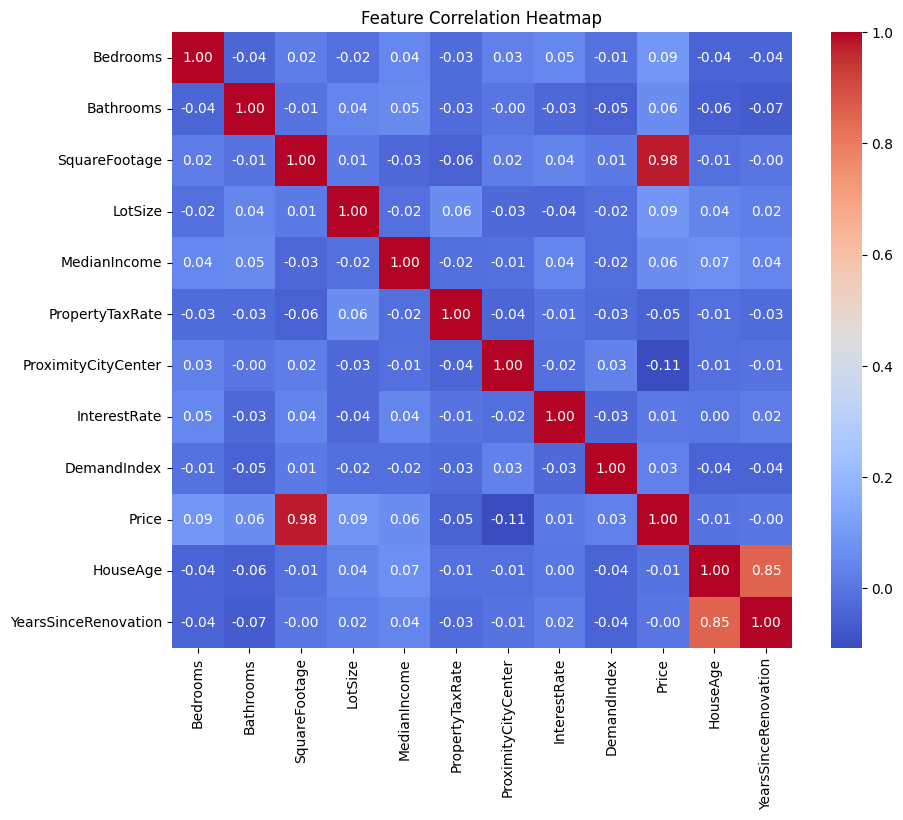

In [40]:

# Plot heatmap to show feature importance
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

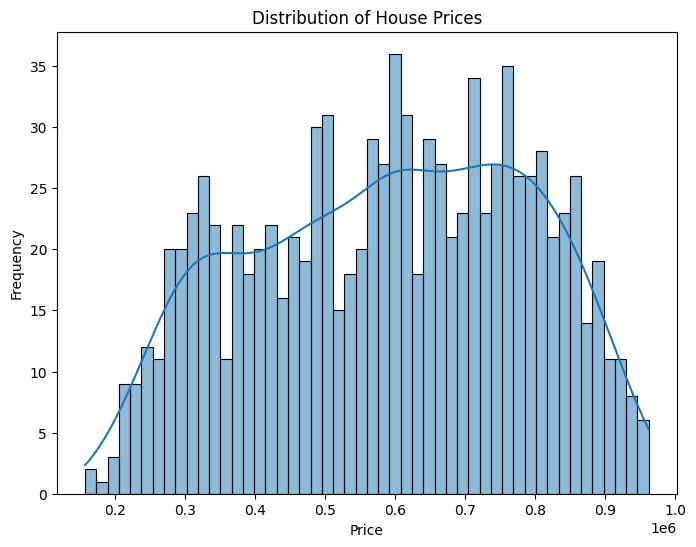

In [48]:


plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

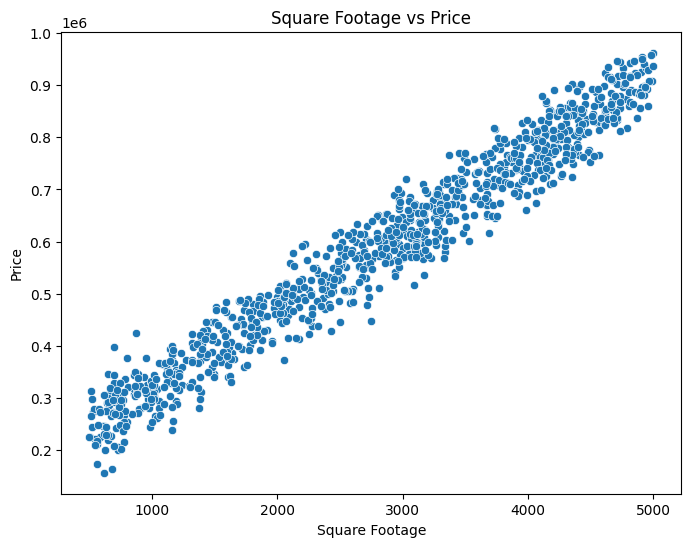

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['SquareFootage'], y=data['Price'])
plt.title("Square Footage vs Price")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.show()

In [41]:
# Define features and target variable
X = data.drop(columns=['Price'])
y = data['Price']

In [42]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Train the model using XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
# Make predictions
y_pred = model.predict(X_test_scaled)




In [46]:
# Evaluate the model
evaluation_metrics = evaluate_model(y_test, y_pred)

In [47]:
# Save predictions to CSV
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv("house_price2_predictions.csv", index=False)
